Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 4**: Calculate the volume of the unit hypersphere (radius $=1$, centred at the origin) in $n$ dimensions. 

Draw N uniform random number arrays of size $n$ from the interval `[0,1]` for the $n$ coordinates. Count the number $M$ of hypersphere hits, i.e. coordinates passing the distance condition $$d=\sqrt{\sum_{i=0}^{n-1}\,x_{i}^{2}}\leq{}1.$$ Calculate and return the hyper-volume which is $2^{n}$ times the fraction $M/N$.

**Task**: Write a function `hvolume(ndim, nsim)` which takes the number of dimensions as first input and the number of Monte-Carlo attempts as the second argument. Return the calculated hyper-volume. Plot the hyper-volume values as a function of dimensions for dimensions in the interval `[3, 10]`. Hint: High dimensional spaces are difficult to sample by points hence consider a large $>10^{4}$ number of simulations before results stabilize.

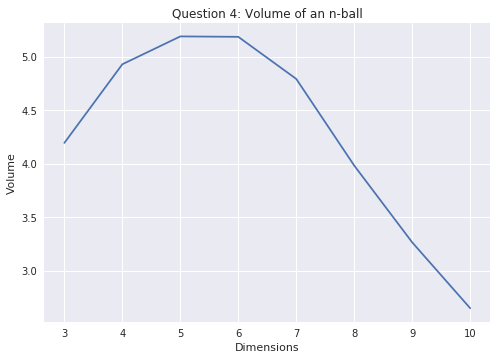

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def hvolume(ndim, nsim=100000):
    return (
        2 ** ndim
        * sum([1 for _ in range(nsim) if np.linalg.norm(np.random.random(ndim)) <= 1])
        / nsim
    )


lower_dim = 3
upper_dim = 10

plt.style.use("seaborn")
xvalues = np.arange(lower_dim, upper_dim + 1)
yvalues = np.vectorize(hvolume)(xvalues)
fig, ax = plt.subplots()
ax.plot(xvalues, yvalues, label="Volume")
ax.xaxis.set_ticks(xvalues)
ax.set_xlabel("Dimensions")
ax.set_ylabel("Volume")
ax.set_title("Question 4: Volume of an n-ball")
fig.show()

In [2]:
# Test cell
v1 = hvolume(4, 20000)
v2 = hvolume(9, 20000)
assert v1 > v2, "wrong volume comparison"

In [3]:
# Test cell
assert v1 > 4.8 and v1 < 5.1, "wrong 4D volume value"

### Tests - 4 marks; Style - 1 mark; Plot - 2 marks